In [14]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt

from astropy.table import Table, vstack
import pyphot

lib = pyphot.get_library()

radius_sun = 6.957e8
mass_sun = 1.9884e30
newton_G = 6.674e-11
pc_to_m = 3.086775e16
speed_light = 299792458 #m/s

In [15]:
masses = [ 0.35153, 0.38444, 0.39856, '0.41600', '0.44810']
path = lambda x: 'lowmass/m{}CO.SDSS'.format(x)


In [16]:
data = Table()

for mass in masses:
    table = Table.read(path(mass), format='ascii')
    table.rename_columns(['col1','col2','col3','col4','col5','col6','col7','col8','col9'],
                        ['teff', 'logg', 'logL', 'age', 'SDSS_u_mag', 'SDSS_g_mag', 'SDSS_r_mag', 'SDSS_i_mag', 'SDSS_z_mag'])
    table['mass'] = [float(mass)] * len(table)
    table['radius'] = np.sqrt(newton_G * (table['mass'] * mass_sun) / (10**table['logg']/100)) / radius_sun

    mag_cols = ['SDSS_u_mag', 'SDSS_g_mag', 'SDSS_r_mag', 'SDSS_i_mag', 'SDSS_z_mag']

    for col in mag_cols:
        table[col[:-4]] = (4*np.pi)**-1 * 10**(-0.4*(table[col] + lib[col[:-4]].Vega_zero_mag)) * ((10*3.086775e16) / (6.957e8*table['radius']))**2

    data = vstack([data, table])


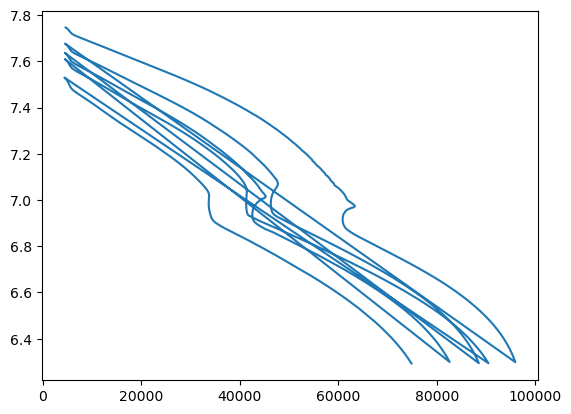

In [17]:
plt.plot(data['teff'], data['logg'])

In [12]:
data.write('CO_LowMass.csv')